In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
class Arm:
    def __init__(self, p):
        self.p = p
    
    def pull(self):
        return np.random.binomial(1, self.p)

In [53]:
class MultiBandit:
    def __init__(self, probs=[0.1, 0.2, 0.7, 0.4]):
        self.__arms = [Arm(p) for p in probs]
        self.__regret = 0
        self.__maxp = max(probs)

    def num_arms(self):
        return len(self.__arms)

    def pull(self, arm_num):
        reward = self.__arms[arm_num].pull()
        self.__regret += self.__maxp - self.__arms[arm_num].p
        return reward
    
    def regret(self):
        return self.__regret

In [54]:
class epsilongreedyalgorithm:
    def __init__(self, num_arms, horizon, epsilon):
        self.num_arms = num_arms
        self.horizon = horizon
        self.epsilon = epsilon
        self.timestep = 0
        self.arm_pulls = np.zeros(num_arms)
        self.arm_rewards = np.zeros(num_arms)
        self.regrets = np.zeros(horizon)
        self.best_arm = None

    def give_best_arm(self):
        return self.best_arm

    def select_arm(self):
        if np.random.rand() < self.epsilon:
           
            return np.random.choice(self.num_arms)
        else:
          
            return np.argmax(self.arm_rewards / (self.arm_pulls + 1e-5))

    def run_algorithm(self, bandit):
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()
            reward = bandit.pull(arm_to_pull)
            self.arm_pulls[arm_to_pull] += 1
            self.arm_rewards[arm_to_pull] += reward
            self.timestep += 1
            self.regrets[_] = bandit.regret()

        self.best_arm = np.argmax(self.arm_rewards / (self.arm_pulls + 1e-5))
        print(f"Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {self.give_best_arm()}")


    def plot(self, label):
        plt.plot(np.cumsum(self.regrets), label=label)

In [55]:
class ucbalgorithm:
    def __init__(self, num_arms, horizon, c):
        self.num_arms = num_arms
        self.horizon = horizon
        self.c = c  # Exploration-exploitation tradeoff parameter
        self.timestep = 0
        self.arm_pulls = np.zeros(num_arms)
        self.arm_rewards = np.zeros(num_arms)
        self.regrets = np.zeros(horizon)
        

    def give_best_arm(self):
        max_index = 0
        for i in range(self.num_arms):
            if self.arm_rewards[max_index]/self.arm_pulls[max_index] < self.arm_rewards[i]/self.arm_pulls[i]:
                max_index = i
        return max_index

    def select_arm(self):
       
        if self.timestep < self.num_arms:
            return self.timestep
        max = 0
        for i in range(self.num_arms):
           if (self.arm_rewards[max] / self.arm_pulls[max]) + np.sqrt(2* np.log(self.timestep) / self.arm_pulls[max]) < (self.arm_rewards[i] / self.arm_pulls[i]) + np.sqrt(2 * np.log(self.timestep) / self.arm_pulls[i]):
              max = i
        return max


    def run_algorithm(self, bandit):
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()
            reward = bandit.pull(arm_to_pull)
            self.arm_pulls[arm_to_pull] += 1
            self.arm_rewards[arm_to_pull] += reward
            self.timestep += 1
            self.regrets[_] = bandit.regret()

        self.best_arm = np.argmax(self.arm_rewards / (self.arm_pulls + 1e-5))
        print(f"Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {self.give_best_arm()}")
 
    def plot(self, label):
        plt.plot(np.cumsum(self.regrets), label=label)

In [56]:
class thompsonsamplingalgorithm:
    def __init__(self, num_arms, horizon):
        self.num_arms = num_arms
        self.horizon = horizon
        self.timestep = 0
        self.arm_successes = np.ones(num_arms)
        self.arm_failures = np.ones(num_arms)
        self.regrets = np.zeros(horizon)
        self.best_arm = None

    def give_best_arm(self):
        return self.best_arm

    def select_arm(self):
        samples = np.random.beta(self.arm_successes + 1, self.arm_failures + 1)
        return np.argmax(samples)

    def run_algorithm(self, bandit):
        for t in range(self.horizon):
            arm_to_pull = self.select_arm()
            reward = bandit.pull(arm_to_pull)
            if reward == 1:
                self.arm_successes[arm_to_pull] += 1
            else:
                self.arm_failures[arm_to_pull] += 1
            self.timestep += 1
            self.regrets[t] = bandit.regret()  
        self.best_arm = np.argmax(self.arm_successes + self.arm_failures)
        print(f"Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {self.give_best_arm()}")

    def plot(self, label):
        plt.plot(np.cumsum(self.regrets), label=label)

In [57]:
def run_experiment(bandit, algorithms, horizon):
    for algorithm in algorithms:
        bandit_instance = MultiBandit()  # Create a new bandit instance for each algorithm
        algorithm.run_algorithm(bandit_instance)
        timesteps = np.arange(horizon)
       
        plt.plot(timesteps, algorithm.regrets)
        plt.xlabel('Timesteps')
        plt.ylabel('Total Regret')
        plt.title(f'{algorithm.__class__.__name__}: Total Regrets vs Timesteps')
        plt.show()


    # plt.xlabel("Timestep")
    # plt.ylabel("Total Regret")
    # plt.title("Comparison of Algorithms")
    # plt.legend()
    # plt.show()

In [58]:
bandit = MultiBandit()

In [59]:
H = 1000

In [60]:
epsilon_greedy = epsilongreedyalgorithm(num_arms=bandit.num_arms(), horizon=H, epsilon=0.2)
ucb_algorithm = ucbalgorithm(num_arms=bandit.num_arms(), horizon=H, c=0.18)
thompson_sampling = thompsonsamplingalgorithm(num_arms=bandit.num_arms(), horizon=H)

In [61]:
algorithms_to_run = [epsilon_greedy, ucb_algorithm, thompson_sampling]

Total Regret after 1000 timesteps: 63.39999999999999 with assumed best arm 2


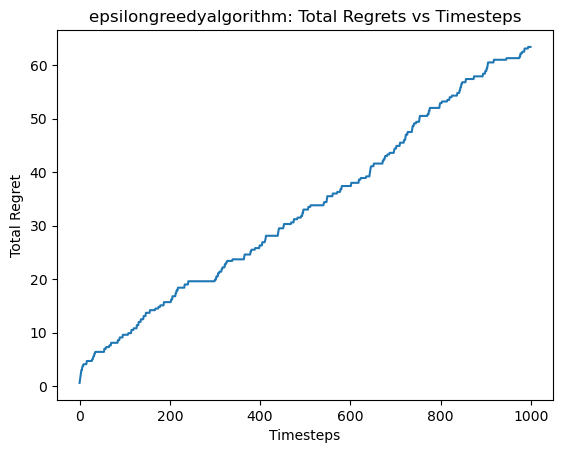

Total Regret after 1000 timesteps: 62.29999999999992 with assumed best arm 2


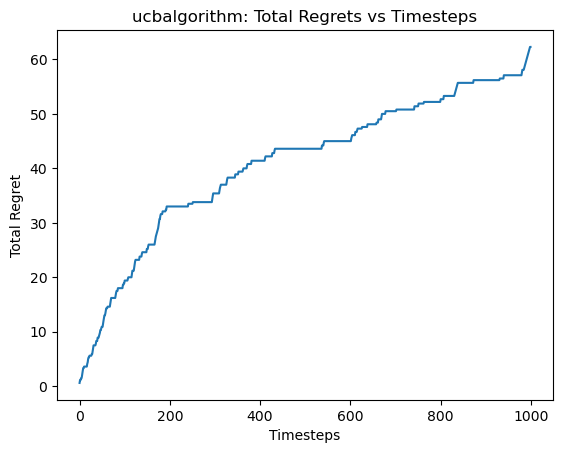

Total Regret after 1000 timesteps: 16.600000000000005 with assumed best arm 2


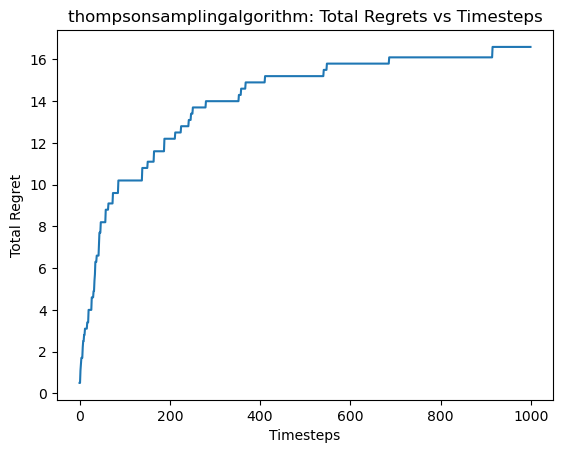

In [62]:
run_experiment(bandit, algorithms_to_run, H)